**Decision Tree Tutorial for Weather Prediction**


In [ ]:

pip install pandas numpy matplotlib seaborn scikit-learn graphviz


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
# Replace 'weather_data.csv' with the path to your dataset file
data = pd.read_csv('seattle-weather.csv')

# Display the first five rows
print("First five rows of the dataset:")
print(data.head())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# **New Addition: Count of Each Weather Class**
print("\nCount of Each Weather Class:")
weather_counts = data['weather'].value_counts()
print(weather_counts)


First five rows of the dataset:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain

Summary Statistics:
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

Missing Values:
date  

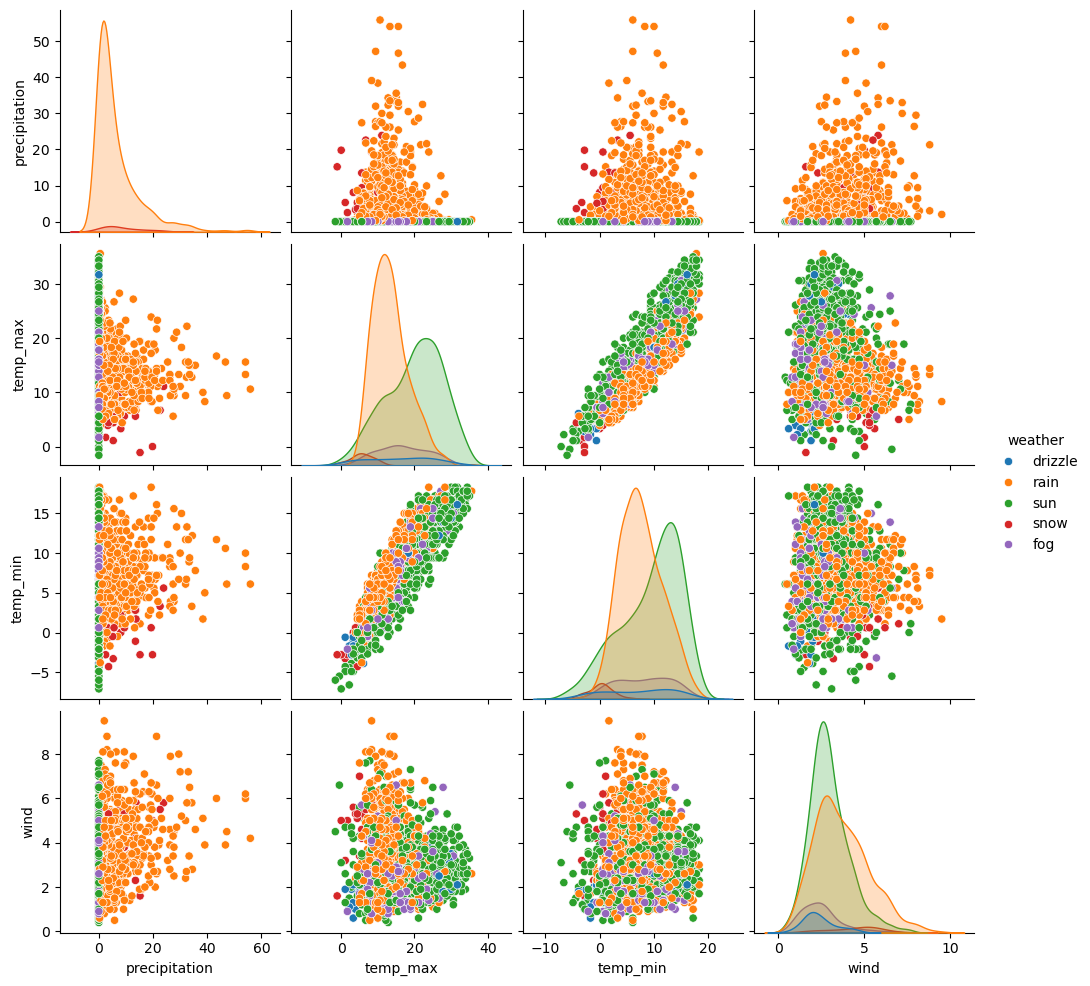

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame
# Replace 'target_column' with your target column name
sns.pairplot(data, hue='weather', diag_kind='kde')
plt.show()

In [21]:
# Check the number of missing values in each column
print("Missing Values Before Handling:")
print(data.isnull().sum())



Missing Values Before Handling:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'weather' column
data['weather_encoded'] = le.fit_transform(data['weather'])

# Display the mapping
weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Weather Encoding Mapping:")
print(weather_mapping)

# Display the first few rows to verify encoding
print("\nEncoded 'weather' Column:")
print(data[['weather', 'weather_encoded']].head())


Weather Encoding Mapping:
{'drizzle': np.int64(0), 'fog': np.int64(1), 'rain': np.int64(2), 'snow': np.int64(3), 'sun': np.int64(4)}

Encoded 'weather' Column:
   weather  weather_encoded
0  drizzle                0
1     rain                2
2     rain                2
3     rain                2
4     rain                2


In [23]:
# Define feature columns and target
feature_columns = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = data[feature_columns]
y = data['weather_encoded']

print("Features:")
print(X.sample(8, random_state=69))

print("\nTarget:")
print(y.sample(8, random_state=69))


Features:
      precipitation  temp_max  temp_min  wind
916             0.0      24.4      13.3   2.2
875             5.6      15.0      10.6   1.4
268             0.0      19.4      11.1   1.7
886             0.0      22.2      10.0   2.4
777            26.4       9.4       3.9   7.9
1163            0.0      14.4       4.4   1.8
1204            0.0      21.1       8.3   3.6
1276            0.0      30.6      15.0   3.4

Target:
916     1
875     2
268     4
886     4
777     2
1163    1
1204    4
1276    1
Name: weather_encoded, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")


Training Set Size: (1168, 4)
Testing Set Size: (293, 4)


In [25]:
# we used scikit-learn's DecisionTreeClassifier, which is based on the CART algorithm

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

# Train the model
clf.fit(X_train, y_train)

print("Decision Tree model has been trained.")


Decision Tree model has been trained.


Accuracy: 0.79
Precision (Weighted): 0.77
Recall (Weighted): 0.79
F1-Score (Weighted): 0.78


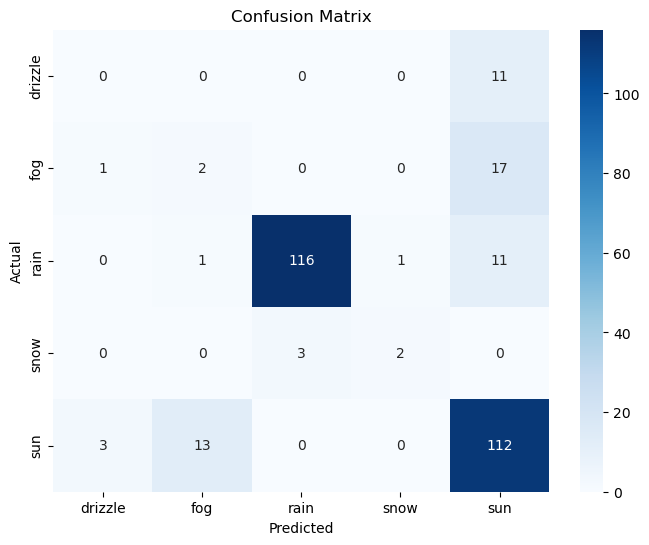


Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.12      0.10      0.11        20
        rain       0.97      0.90      0.94       129
        snow       0.67      0.40      0.50         5
         sun       0.74      0.88      0.80       128

    accuracy                           0.79       293
   macro avg       0.50      0.45      0.47       293
weighted avg       0.77      0.79      0.78       293



In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1-Score (Weighted): {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


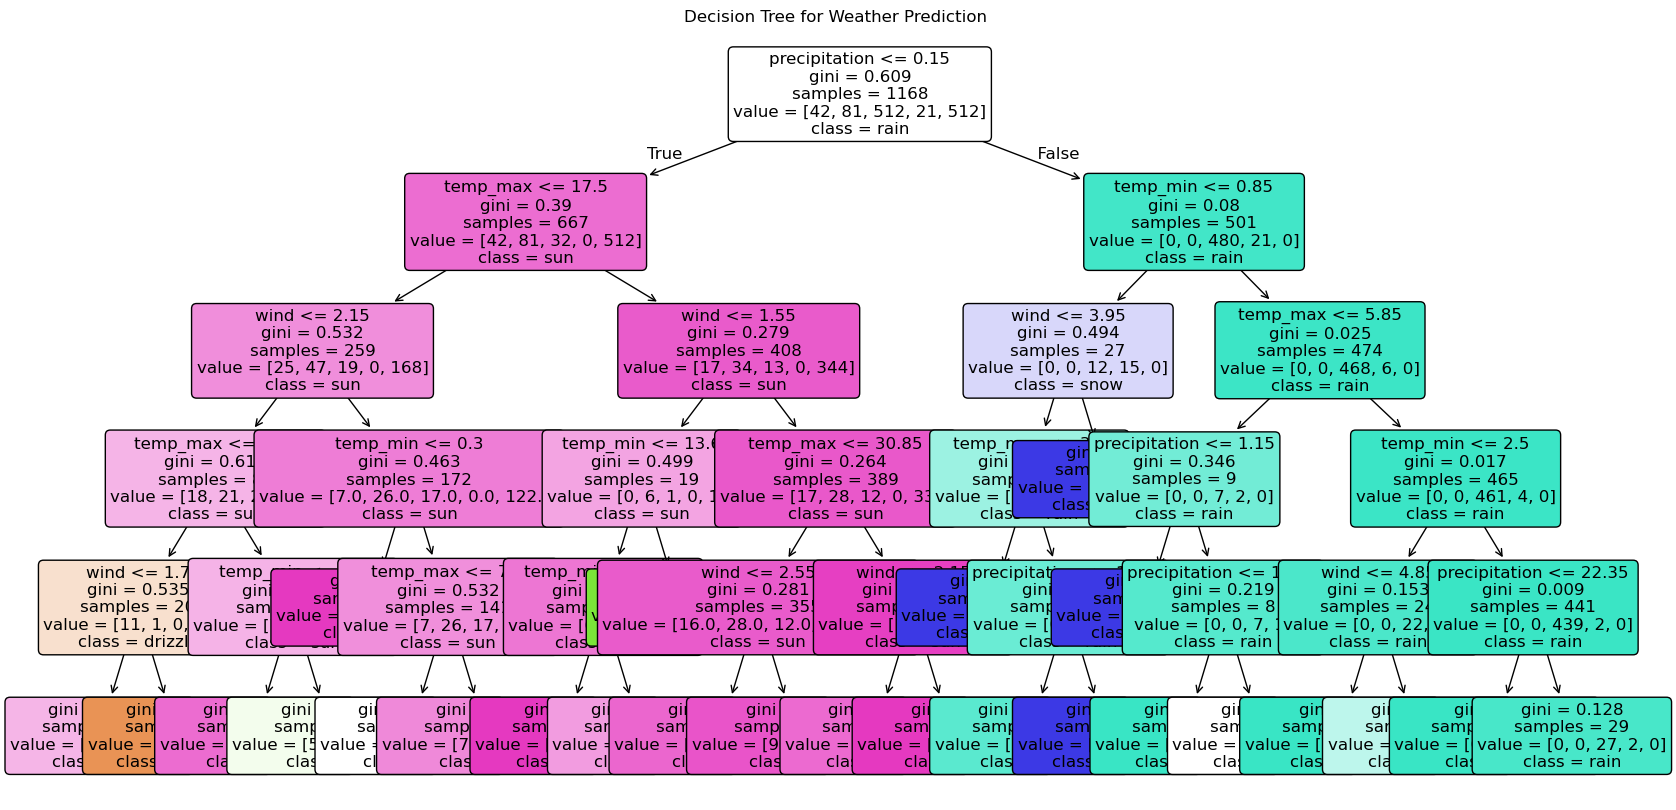

In [32]:
from sklearn import tree

# Set the size of the plot
plt.figure(figsize=(20,10))

# Plot the tree
tree.plot_tree(
    clf,
    feature_names=feature_columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)

plt.title('Decision Tree for Weather Prediction')
plt.show()


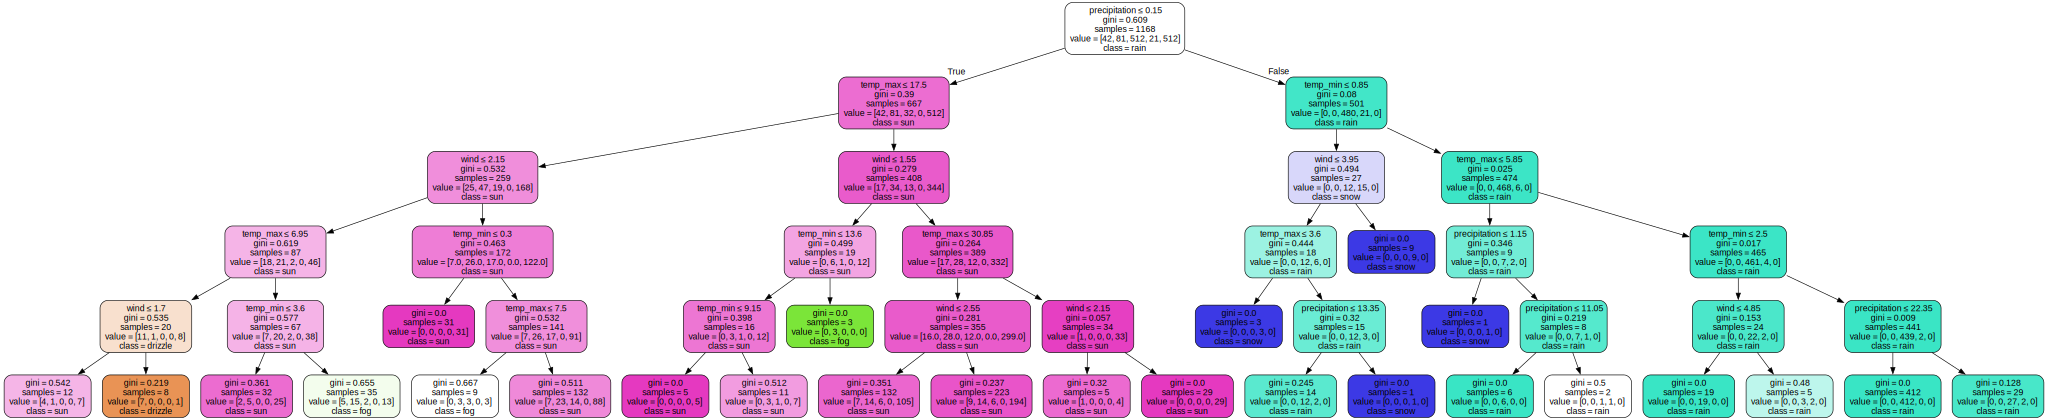

In [33]:
import graphviz
from sklearn.tree import export_graphviz

# Export as DOT file
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree_weather")  # Save as a PDF or image file

# Display the graph (Jupyter-compatible)
graph
